# Convolutions

Finite differencing methods can be interpreted as a form of a *convolution*. These are commonly encountered in image processing, for example in order to sharpen or blur an image. Certain convolutions are equivalent to computing numerical derivatives, and in fact are useful for certain routines such as gradient detection in image processing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

A generic implementation useful in multiple dimensions is included in `scipy.signal`. As per usual, we can look at the documentation. Note that this function will accept an input array and a window function. The window function is also sometimes referred to as a "kernel", and describes how nearby points in an array are added together.

Also note that this function will "zero pad" the input array by default, or it assumes values in the padding region are all zero in order to return a complete convolution of the function outside of the domain. For solving PDEs, we will not want this, so we will usually supply the `mode='valid'` flag.

In [2]:
from scipy import signal

In [7]:
signal.convolve?

In the lab this week, we will be looking at a function comprised of two Gaussians, one positive and one negative. Below, we can compare finite differencing to performing a convolution with a kernel that performs this operation for us.

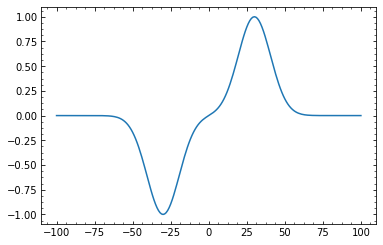

In [8]:
# Grid of x-points
Nx = 201
xs = np.linspace(-100, 100, Nx)
dx = xs[1] - xs[0]
# Function values and a quick plot
f = np.exp(-(xs-30)**2/15**2) - np.exp(-(xs+30)**2/15**2)
plt.plot(xs, f)

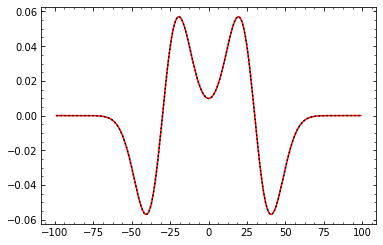

In [12]:
# Centered finite difference derivative
f_deriv = ( f[2:] - f[:-2] ) / (2*dx)

# Convolution derivative
ker = np.array([1, 0, -1])/(2*dx)
f_convolved = signal.convolve(f, ker, mode='valid')

plt.plot(xs[1:-1], f_convolved, 'r-')
plt.plot(xs[1:-1], f_deriv, 'k:')